Mean Squared Error: 1503.9772283586044
R-squared: 0.9999236470466608


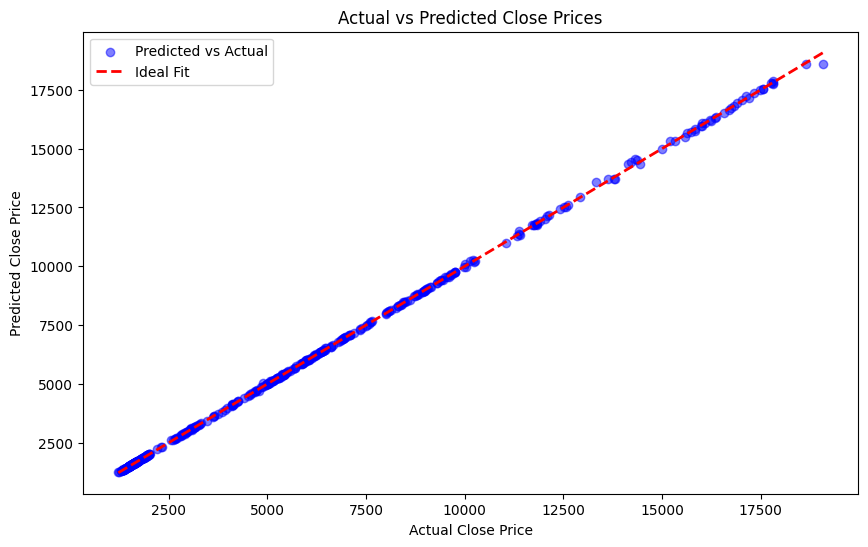

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from datetime import datetime, timedelta

file_path ="D:\\Neural_Network\\DataSets\\Bajaj Finserv.csv"  # File Path
df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Drop the 'No of trades' column (not relevant for price prediction)
df.drop('No of trades', axis=1, inplace=True)

# Define the feature columns (X) and the target column (y)

X = df.drop(['close'], axis=1)
y = df['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test.values, y_pred, label='Predicted vs Actual', color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.legend()
plt.title('Actual vs Predicted Close Prices')
plt.show()

In [39]:
# Get today's date
today = datetime.today()

# Calculate tomorrow's date
tomorrow = today + timedelta(days=1)

# Format tomorrow's date as a string
tomorrow_date_str = tomorrow.strftime('%d-%m-%Y')

# Get the last row of your DataFrame
last_row = df.iloc[-1]

# Create a new data point for tomorrow's date
today_data = np.array([[last_row['OPEN'], last_row['HIGH'], last_row['LOW'], last_row['PREV. CLOSE'], last_row['ltp'], last_row['vwap'], last_row['52W H'], last_row['52W L'], last_row['VOLUME'], last_row['VALUE']]])

# Predict tomorrow's stock price
tomorrow_stock_price = rf.predict(today_data)

print("Date:", tomorrow_date_str)
print("Predicted Stock Price:", tomorrow_stock_price[0])

Date: 09-07-2024
Predicted Stock Price: 1603.7915000000016


C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
